## NACA 4-Series generator

Philipp Schlatter, 2017-2025

Colab: https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/NACA-profiledata.ipynb

<a target="_blank" href="https://colab.research.google.com/github/pschlatt1/notebooks/blob/main/NACA-profiledate.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Preliminaries

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  # for Google Colab and interative figures
  !pip install -q ipympl
  get_ipython().kernel.do_shutdown(restart=True)

In [2]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  # for Google Colab and interative figures
  # !pip install -q ipympl
  #get_ipython().kernel.do_shutdown(restart=True)
  from google.colab import output
  output.enable_custom_widget_manager()

In [3]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
#from array import *

### Parameters:

In [4]:
# NACA4412
m=4./100
p=4./10
t=12./100.

# wedge spreading orthogonal to camber line
#wd = 0.0005
wd = 0.
# wedge spreading in y direction
wd1 = 0.0

### Compute profile:

In [5]:
pp=max(p,0.1)     # make sure that you have some refinement at the leading edge even for p=0
NpointsLE=200;      #Number of divisions before x/c=p
dtheta=(np.pi/2)/NpointsLE;
theta = np.arange(0.0, np.pi/2, dtheta)       #Half-cosine distribution up to x=p in order to refine LE
x1 = (1-np.cos(theta))*pp
dx = x1[NpointsLE-1]-x1[NpointsLE-2];     #Linear distribution from x=p to TE
#x2 = np.arange(pp,1,dx)
NpointsTE = int( (1-pp)//dx)
x2 = np.linspace(pp,1,NpointsTE)
x = np.concatenate((x1,x2))

# original (open NACA)
yt = 5*t*(0.2969*np.sqrt(x)-0.1260*x-0.3516*x**2+0.2843*x**3-0.1015*x**4)
# modified to get zero at the end (closed NACA)
yt = 5*t*(0.2969*np.sqrt(x)-0.1260*x-0.3516*x**2+0.2843*x**3-0.1036*x**4)

# wedge orthogonal to camber line
yt+=wd*x

if p>0:
  yc1 = m/p**2*(2*p*x1-x1**2)
  yc2 = m/(1-p)**2*((1-2*p)+2*p*x2-x2**2)
else:
  yc1 = 0*x1
  yc2 = 0*x2    
  
yc=np.concatenate((yc1,yc2))

if p>0:
  dd1 = 2*m/p**2*(p-x1)
  dd2 = 2*m/(1-p)**2*(p-x2)
  th1=np.arctan(dd1)
  th2=np.arctan(dd2)
else:
  dd1 = 0*x1
  dd2 = 0*x2
  th1 = 0*x1
  th2 = 0*x2     
th = np.concatenate((th1,th2))

# Include the camber:
# only move in y direction (as in xfoil, American style), if commented British style
#th = 0*th

# move along the camber line:
xu = x - yt*np.sin(th)
yu = yc + yt*np.cos(th)
xl = x + yt*np.sin(th)
yl = yc - yt*np.cos(th)

#Scale the chord before generating profile
chord = 1; #chord in [mm]
xu = xu*chord;
yu = yu*chord;
xl = xl*chord;
yl = yl*chord;
x1 = x1*chord;
yc1 = yc1*chord;
x2 = x2*chord;
yc2 = yc2*chord;

# add wedge spread in y direction
yu+=wd1*x
yl-=wd1*x

### Plot the profile:

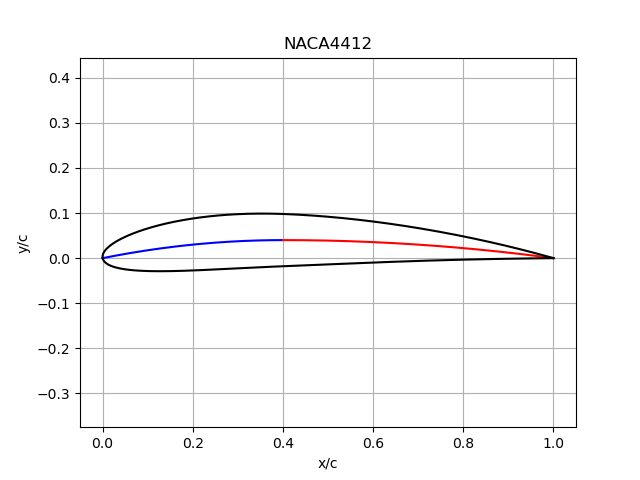

In [6]:
plt.figure()
plt.plot(x1, yc1, 'b')
plt.plot(x2,yc2,'r')
plt.plot(xu,yu,'k',xl,yl,'k')
plt.axis('equal')
plt.title('NACA4412')
plt.ylabel('y/c')
plt.xlabel('x/c')
plt.grid(True)
plt.show()

In [7]:
#write out current profile
f = open('NACA4412.txt','w')
print("NACA4412 profile data",file=f)
for i in range(xu.size-1,0,-1):
    print(" %18.9f %18.9f"%(xu[i],yu[i]),file=f)
for i in range(0,xl.size):
    print(" %18.9f %18.9f"%(xl[i],yl[i]),file=f)
f.close()

f = open('Pressure_side_NACA4412.txt','w')
for i in range(0,xu.size):
    print(" %18.9f %18.9f"%(xu[i],yu[i]),file=f)
f.close()

f = open('Suction_side_NACA4412.txt','w')
for i in range(0,xl.size):
    print(" %18.9f %18.9f"%(xl[i],yl[i]),file=f)
f.close()
